# **Course: Image Processing and Applications (CS406.Q11)**
**Group ID - Group Name:** 9 - Thăng Sắc 

**Member:** 
- Nguyen Cong Phat - 23521143 (Leader)
- Nguyen Xuan An - 23520023
- Truong Hoang Thanh An - 23520032
- Vu Viet Cuong - 23520213


### **FLAME Dataset Split Notebook**
This notebook splits the original FLAME dataset (images + labels)
into train / validation / test sets for semantic segmentation.

Split ratio:
- Train: 60%
- Validation: 20%
- Test: 20%

Final directory structure:
```
dataset/
    ├── train/
    │   ├── images/
    │   └── masks/
    ├── val/
    │   ├── images/
    │   └── masks/
    └── test/
        ├── images/
        └── masks/
```

## **1. Import Required Libraries**

In [1]:
import os
import random
import shutil
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## **2. Set Random Seed**

In [2]:
# Set random seed for reproducibility
SEED = 42
random.seed(SEED)

## **3. Define Dataset Paths**

In [ ]:
# Original dataset directories
RAW_IMG_DIR = "/mnt/d/dataset_raw/Images"
RAW_MASK_DIR = "/mnt/d/dataset_raw/Masks"

# Output dataset directory
OUTPUT_DIR = "/mnt/d/flame-dataset"

#Check before listdir
if os.path.exists(RAW_IMG_DIR):
    image_files = sorted(os.listdir(RAW_IMG_DIR))
    mask_files = sorted(os.listdir(RAW_MASK_DIR))
    print(f"Total images: {len(image_files)}")
    print(f"Total masks : {len(mask_files)}")
else:
    print(f"Không tìm thấy đường dẫn: {os.path.abspath(RAW_IMG_DIR)}")

Total images: 2003
Total masks : 2003


## **4. Define Train / Val / Test Ratios (6 / 2 / 2)**

In [4]:
TRAIN_RATIO = 0.6
VAL_RATIO = 0.2
TEST_RATIO = 0.2

assert TRAIN_RATIO + VAL_RATIO + TEST_RATIO == 1.0, "Ratios must sum to 1"

## **5. Load Image and Mask Lists**

In [5]:
image_files = sorted(os.listdir(RAW_IMG_DIR))
mask_files = sorted(os.listdir(RAW_MASK_DIR))

print(f"Total images: {len(image_files)}")
print(f"Total masks : {len(mask_files)}")

assert len(image_files) == len(mask_files), "Image-mask count mismatch"


Total images: 2003
Total masks : 2003


## **6. Verify Image–Mask Correspondence**

In [6]:
# Check image-mask filename matching
for img_name in image_files[:10]:
    expected_mask = img_name.replace(".jpg", ".png")
    assert expected_mask in mask_files, f"Missing mask for {img_name}"

print("Image-mask correspondence verified.")


Image-mask correspondence verified.


## **7. Shuffle Dataset**

In [7]:
random.shuffle(image_files)

## **8. Split Dataset**

In [8]:
num_samples = len(image_files)

train_end = int(num_samples * TRAIN_RATIO)
val_end = train_end + int(num_samples * VAL_RATIO)

train_files = image_files[:train_end]
val_files = image_files[train_end:val_end]
test_files = image_files[val_end:]

print(f"Train samples: {len(train_files)}")
print(f"Val samples  : {len(val_files)}")
print(f"Test samples : {len(test_files)}")


Train samples: 1201
Val samples  : 400
Test samples : 402


## **9. Create Output Directory Structure**

In [9]:
for split in ["train", "val", "test"]:
    for sub in ["images", "masks"]:
        os.makedirs(os.path.join(OUTPUT_DIR, split, sub), exist_ok=True)

print("Directory structure created.")


Directory structure created.


## **10. Define Copy Function**

In [10]:
def copy_split(files, split_name):
    img_dst = os.path.join(OUTPUT_DIR, split_name, "images")
    mask_dst = os.path.join(OUTPUT_DIR, split_name, "masks")

    for img_name in tqdm(files, desc=f"Copying {split_name}"):
        mask_name = img_name.replace(".jpg", ".png")

        shutil.copy(
            os.path.join(RAW_IMG_DIR, img_name),
            os.path.join(img_dst, img_name)
        )

        shutil.copy(
            os.path.join(RAW_MASK_DIR, mask_name),
            os.path.join(mask_dst, mask_name)
        )


## **11. Copy Data**

In [11]:
# Copy Train Data
copy_split(train_files, "train")

Copying train:   0%|          | 0/1201 [00:00<?, ?it/s]

Copying train: 100%|██████████| 1201/1201 [01:59<00:00, 10.05it/s]


In [12]:
# Copy Validation Data
copy_split(val_files, "val")

Copying val: 100%|██████████| 400/400 [00:27<00:00, 14.51it/s]


In [13]:
# Copy Test Data
copy_split(test_files, "test")


Copying test: 100%|██████████| 402/402 [00:30<00:00, 13.02it/s]


## **12. Verify Split Integrity**

In [14]:
def count_split(split):
    img_count = len(os.listdir(os.path.join(OUTPUT_DIR, split, "images")))
    mask_count = len(os.listdir(os.path.join(OUTPUT_DIR, split, "masks")))
    return img_count, mask_count

for split in ["train", "val", "test"]:
    imgs, masks = count_split(split)
    print(f"{split.upper()} -> images: {imgs}, masks: {masks}")
    assert imgs == masks, f"Mismatch in {split}"

print("Dataset integrity check passed.")


TRAIN -> images: 1201, masks: 1201
VAL -> images: 400, masks: 400
TEST -> images: 402, masks: 402
Dataset integrity check passed.


## **13. Visualize Sample Train Images with Masks**

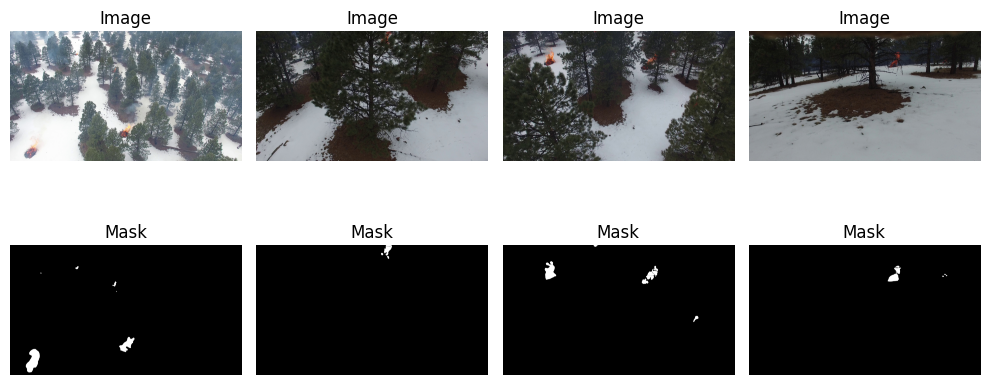

In [15]:
def visualize_samples(num_samples=4):
    train_img_dir = os.path.join(OUTPUT_DIR, "train", "images")
    train_mask_dir = os.path.join(OUTPUT_DIR, "train", "masks")

    sample_images = random.sample(os.listdir(train_img_dir), num_samples)

    plt.figure(figsize=(10, 5))

    for i, img_name in enumerate(sample_images):
        img_path = os.path.join(train_img_dir, img_name)
        mask_path = os.path.join(train_mask_dir, img_name.replace(".jpg", ".png"))

        image = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")

        # Image
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(image)
        plt.title("Image")
        plt.axis("off")

        # Mask
        plt.subplot(2, num_samples, i + 1 + num_samples)
        plt.imshow(mask, cmap="gray")
        plt.title("Mask")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

visualize_samples(num_samples=4)


## **14. Visualize Dataset Distribution**

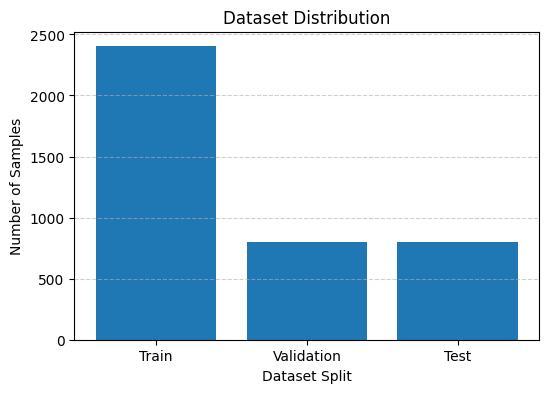

In [16]:
splits = ["Train", "Validation", "Test"]
counts = [
    len(train_files)*2,
    len(val_files)*2,
    len(test_files)*2
]

plt.figure(figsize=(6, 4))
plt.bar(splits, counts)
plt.title("Dataset Distribution")
plt.xlabel("Dataset Split")
plt.ylabel("Number of Samples")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()
